<a href="https://colab.research.google.com/github/felipe-parodi/DL4DataScience/blob/main/Week9_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Homework

In [ ]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'fparodi' #@param {type:"string"}
my_pod = 'superfluous-lyrebird' #@param ['Select', 'euclidean-wombat', 'sublime-newt', 'buoyant-unicorn', 'lackadaisical-manatee','indelible-stingray','superfluous-lyrebird','discreet-reindeer','quizzical-goldfish','astute-jellyfish','ubiquitous-cheetah','nonchalant-crocodile','fashionable-lemur','spiffy-eagle','electric-emu','quotidian-lion']


## Section 1: Role of social media platforms in mitigating hate speech

Social media platforms have instituted not just user policies for online conduct, but also technological mechanisms to identify and remove hate speech.  As an example, review Facebook’s discussion of how its employing AI to identify hate speech.  As you read this article, pay particular attention to the specific challenges they enumerate in identifying hate speech. 

"AI advances to better detect hate speech" 

https://ai.facebook.com/blog/ai-advances-to-better-detect-hate-speech/

*Facebook, 2020* [10-minute read]

The Facebook article emphasizes that the challenges to identifying hate speech are both social and technological.  The social considerations include the importance of cultural context as well as the nuances of languages. How does that resonate with the "Excavating AI: The Politics of Images in Machine Learning Training Sets" article you read in Week 6?  What do you think of Facebook’s approach? (200-300 words)

In [ ]:
section1_ans = 'The problem of identifying and filtering hate speech is complex. While reading the article, I wondered whether the public is too hard on Facebook. Do we really understand just how multi-dimensional the issue of censoring all forms of hate speech truly is? Of course not. At the time of publication in May 2020, Facebook\u2019s AI was responsible for removing 88% of hate speech content. That is exceptional, and we would be fools to not laud the company for that feat. Beyond their AI, FB has ~30,000 employees responsible for manual content moderation. This is a big number, and we should not underestimate it. Facebook, fortunately, has clear definitions of hate speech. The article listed several issues that contribute to the difficulty of detecting hate speech: context, language usage distinctions (e.g., dialects, sarcasm), idioms, and mode. However, the task of identifying and censoring hate speech is deceptively complex; and it becomes even more challenging to combat it when it is nature can be multimodal. I am satisfied with Facebook\u2019s approach to combatting hate speech, and I\u2019m particularly impressed by their use of machine learning classifiers and the bi-transformer text model to proactively remove hate speech from their platform. The issue of hate speech will always exist, but Facebook is working to reduce the societal harms of media hate speech.' #@param {type:"string"}

## Section 2: Broader societal considerations of addressing hate speech on social media


Next, read this Medium article about the unintended consequences of technological interventions to address hate speech on social media.

"How Automated Tools Discriminate Against Black Language"    
https://medium.com/@annawchung/how-automated-tools-discriminate-against-black-language-2ac8eab8d6db.  
*Medium, 2019* [14-minute read]

"Challenges in Automated Debiasing for Toxic Language Detection"    
https://arxiv.org/pdf/2102.00086.pdf.  
*Optional – this is much longer and more technical!!!*

How does this example illustrate the complexity of identifying hate speech?  What solutions does the author suggest? Why is it important that AI practitioners have a robust understanding of the societal context and consequence of their work? (1-2 paragraphs)

In [ ]:
section2_ans = 'Identifying hate speech is deceptively complex! How do you account for cross-cultural or cross-regional, let alone cross-linguistic, nuances? How do I train a machine to detect print sarcasm when most humans aren\u2019t able to do so? Due to the complex nature of hate speech, any technological intervention to address the issue will likely always yield an unintended consequence. Take the issue underlying Perspective\u2019s \u201Crudeness\u201D filter. How is it that it largely labels AAVE as hate speech? AAVE has historically been seen as \u201Cless intellectual, acceptable, and respectable\u201D than its White counterpart. How were these systemic and historic biases reproduced in a machine learning algorithm? Sure, we can blame it on the training dataset. I wonder whether it also has to do with increasing polarization on social media. Per Perspective, a \u201Ctoxic\u201D statement can be one that \u201Cis likely to make you leave a discussion.\u201D It wouldn\u2019t be the craziest thing in the world to assume that, if a bias exists in real life (users of typical White American English (WAE) engage [in all its forms] less with AAVE and its users), it would be replicated, and likely amplified, on social media. Following a particular event, such as a white-on-black crime, I\u2019ve noticed that AAVE users (AAVEU) do use more anti-White rhetoric, and non-affectionately refer to White people as \u201Cyts\u201D (pronounced \u201Cwhities\u201D). Per the article, this can be one way in which Black people \u201Csignify\u201D to perform their Black identity. But, then it becomes this unusual feedback loop: WAE user (WAEU) doesn\u2019t engage with AAVE in real life \uF0E0 WAEU develops prejudices \uF0E0 WAEU encounters AAVE(U) on social media \uF0E0 AAVE (may or may not be) used in an anti-White context \uF0E0 WAEU likelier to leave a discussion \uF0E0 WAEU develops prejudices \uF0E0 WAEU engages less with AAVE both online and in real life. This back-of-envelope example is to further demonstrate that identifying hate speech and accounting for cross-cultural nuances is an impossible task. AI practitioners must have a deep understanding of the societal (and social) context and consequence of their work to avoid perpetuating systemic biases and societal harms.' #@param {type:"string"}

## Section 3: Ablation Study on LSTMs

In the tutorials we learnt about the different gates in LSTMs. We also learnt about GRUs that have fewer components than LSTMs but work reasonably well. In this section of the homework you will conduct an ablation study for LSTMs. You will be working on text generation task. The model will be trained on H. G. Wells’ *The Time Machine*.

In order to have a baseline, first intialize the weights and implement the gates of a LSTM. 

For the ablation study change different components listed below (these are suggestions, you are free to use your own ideas as well) and observe the effects on performance. 
- Initialization
- Number of gates
- Replacing sigmoid, tanh with other functions
- Changing the inputs used for each recurrent unit

You will make changes in the `get_lstm_params` and `lstm` functions. We have provided code for forward and backward propagation, training and a sample code to see the text generation results. 
(Please remember to to return tensors with the same shape as the LSTM you will implement to ensure end to end training.)

In [ ]:
#@title Imports
!pip install d2l

import torch
from torch import nn
from d2l import torch as d2l
from torch.nn import functional as F
import math

In [ ]:
def get_lstm_params(vocab_size, num_hiddens):
    
    num_inputs = num_outputs = vocab_size

    # Gaussian distribution with 0.01 standard deviation
    def normal(shape): 
      return torch.randn(size=shape)*0.01

    def three():
      return (normal((num_inputs, num_hiddens)), 
              normal((num_hiddens, num_hiddens)),
              torch.zeros(num_hiddens))

    W_xi, W_hi, b_i = three() # input gate params
    W_xf, W_hf, b_f = three() # forget gate params
    W_xo, W_ho, b_o = three() # output gate params
    W_xc, W_hc, b_c = three() # cand mem cell params

    # Output layer params
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs)

    # List all the parameters and attach gradients
    params = [
        W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c,
        W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

In [ ]:
def lstm(inputs, state, params):
    # Get the model params
    [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c,
        W_hq, b_q] = params
    
    # Get the hidden and cell state
    (H, C) = state

    # Store outputs for each input from a batch 
    outputs = []

    # For each of the inputs in a batch, perform the LSTM operations
    for X in inputs:
        I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
        F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
        O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
        C_tilde = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
        C = F * C + I * C_tilde
        H = O * torch.tanh(C)
        Y = (H @ W_hq) + b_q

        outputs.append(Y)

    return torch.cat(outputs, dim=0), (H, C)

In [ ]:
# Build the LSTM model from scratch
class LSTMScratch:  
    
    """An LSTM Model implemented from scratch."""
    
    def __init__(self, vocab_size, num_hiddens, get_params, forward_fn):

        self.vocab_size, self.num_hiddens, self.forward_fn = vocab_size, num_hiddens, forward_fn
        # Function to initialize all the parameters in the LSTM (defined by you!)
        self.params = get_params(vocab_size, num_hiddens)

    def __call__(self, X, state):
        # Calls the forward function 
        
        # Convert X to a one-hot vector for each character instead of an Embedding
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        
        # Function to pass inputs to the model (defined by you!)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size):
        # Initialize the hidden state and cell state with zeros
        return (torch.zeros((batch_size, num_hiddens), device=device),
            torch.zeros((batch_size, num_hiddens), device=device))

In [ ]:
#@title Training Functions (Run Me!)
# Clip the gradients
def grad_clipping(net, theta):
    """Clip the gradient."""
    params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad**2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

# Optimization Minibatch SGD
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# Training in each epoch
def train_epoch(net, train_iter, loss, optimizer):
    """Train a net within one epoch (defined in Chapter 8)."""

    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # Sum of training loss, no. of tokens
    
    # For every barch in dataloader
    for X, Y in train_iter:
        if state is None:
            # Initialize `state` when either it is the first iteration or
            # using random sampling
            state = net.begin_state(batch_size=X.shape[0])
        else:
            # `state` is a tuple of tensors for our custom scratch implementation
            for s in state:
                s.detach_()

        # Pass input and state to the model
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)

        # Compute loss, backpropagate and clip the gradient
        l = loss(y_hat, y.long()).mean()
        l.backward()
        grad_clipping(net, 1)

        # Step the optimizer
        optimizer(batch_size=1)

        # Loss metric append    
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

# Predict function
def predict(prefix, num_preds, net, vocab):  
    """Generate new characters following the `prefix`."""    
    # Initialize and tensorize input
    state = net.begin_state(batch_size=1)
    outputs = [vocab[prefix[0]]]
    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape(
        (1, 1))
    
    for y in prefix[1:]:  # Warm-up period
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
    
    for _ in range(num_preds):  # Predict `num_preds` steps
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    
    return ''.join([vocab.idx_to_token[i] for i in outputs])

# Train function
def train(net, train_iter, vocab, lr, num_epochs):
    """Train a model."""

    # Loss function and loss visualization tool 
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity', legend=['train'], xlim=[10, num_epochs])
    
    # Optimizer
    optimizer = lambda batch_size: sgd(net.params, lr, batch_size)

    # Train and predict over each epoch
    for epoch in range(num_epochs):
        ppl, speed = train_epoch(net, train_iter, loss, optimizer)
        
        # Plot every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller', 50, net, vocab))
            animator.add(epoch + 1, [ppl])
    
    # Final predictions
    print(f'perplexity {ppl:.1f}, {speed:.1f} tokens/sec on {str(device)}')
    print(predict('time traveller', 50, net, vocab))
    print(predict('traveller', 50, net, vocab))

In [ ]:
batch_size, num_steps = 32, 25

train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

perplexity 1.0, 4256.3 tokens/sec on cpu
time travelleryou can show black is white by argument said filby
traveller with a slight accession ofcheerfulness really thi


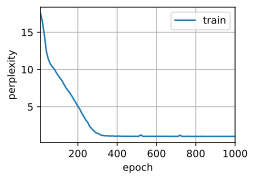

In [ ]:
vocab_size, num_hiddens, device = len(vocab), 512, torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs, lr = 1000, 1

model = LSTMScratch(len(vocab), num_hiddens, get_lstm_params, lstm)
train(model, train_iter, vocab, lr, num_epochs)

In [ ]:
# Add your initial primer strings to this list for testing
sentences = ['time traveller',
             'traveller',
             'machine',
             'smiled',
             'said',
             'he',
             'wait'
]

for sentence in sentences:
    print(predict(sentence, 50, model, vocab))

time travelleryou can show black is white by argument said filby
traveller with a slight accession ofcheerfulness really thi
machine by h g wellsithe time traveller for so it will be
smiled are you sure we can move freely inspace right and
said tily you carovette tount thatour consciousness mo
he lerep s sor do sicilido s aperet i tade far wayou
waitlasioms of shase genean it rose are to es ghink io


Summarize the results of your ablation study. What changes did you make? How was the performance affacted? Provide reasoning for your observations. (200-400 words)

In [ ]:
section3_ans = "\"Minimizing perplexity is the same as maximizing probability.\" changing batch size from 32 to 64 increased perplexity from 2.3 to " #@param {type:"string"}

## Section 4: Know-Your-Pod Better

Discuss with two other members of your pod. What is their favorite movie scene (not just the whole movie, but describe the scene!) of all time? Describe the scene and why they like it so much. (~100 words each)

In [ ]:
section4_ans = "I asked Joseph Goodman and Nicole Chiou for their favorite movie scenes. Joseph said the famous McLovin scene from SuperBad. He didn't give many reasons, as he feels the scene speaks for itself. He's right. Fogel presenting his ID and then getting punched is one of the best scenes in cinema history. Nicole said her favorite movie scene was the yacht scene from the Wolf of Wall Street. What a great choice. The passive aggressive tension is so intense that it's nearly palpable. The scene is a masterpiece. jordan trying to determine whether the agent is soliciting a bribe or attempting to entrap him is just great. The actors, shots, script, and setting are absolutely great." #@param {type:"string"}

---
# Submission
Once you're done, click on 'Share' and add the link to the box below.


In [ ]:
import time
import numpy as np
import urllib.parse
from IPython.display import IFrame

t7 = time.time()

#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**


def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefill_fields = {}
  for key in fields:
      new_key = 'prefill_' + key
      prefill_fields[new_key] = fields[key]
  prefills = urllib.parse.urlencode(prefill_fields)
  src = src + prefills
  return src



#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""

try: my_pod;
except NameError: my_pod = "Select"

try: section1_ans;
except NameError: section1_ans = ""

try: section2_ans;
except NameError: section2_ans = ""

try: section3_ans;
except NameError: section3_ans = ""

try: section4_ans;
except NameError: section4_ans = ""


fields = {"pennkey": my_pennkey,
          "pod": my_pod,
          "section1_ans": section1_ans,
          "section2_ans": section2_ans,
          "section3_ans": section3_ans,
          "section4_ans": section4_ans}

src = "https://airtable.com/shrZdjQjhvUSHVgW5?"


#now instead of the original source url, we do: src = prefill_form(src, fields)
display.Display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))

AttributeError: ignored